<a href="https://colab.research.google.com/github/Hcardenass/RedNeuronal-Celsius-a-Fahrenheit/blob/main/Red_Neuronal_Celsius_a_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
Celsius = np.array([-20, -12, 0, 5, 15, 28, 35], dtype=float)
Fahrenheit = np.array([-4, 10.4, 32, 41, 59, 82.4, 95], dtype=float)



In [5]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

capa1 =tf.keras.layers.Dense(units=3, input_shape=[1])
capa2 =tf.keras.layers.Dense(units=3, input_shape=[1])
salida =tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([capa1,capa2,salida])

In [6]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [7]:
print("Comenzando Entrenamiento")
historial = modelo.fit(Celsius,Fahrenheit,epochs=400,verbose=False)
print("Modelo Entrenado")

Comenzando Entrenamiento
Modelo Entrenado


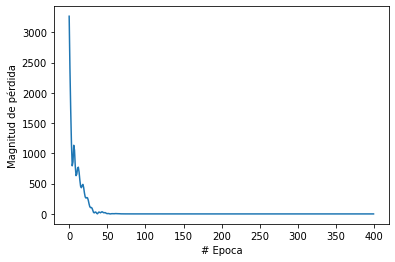

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [9]:
print("Hagamos una predicción")
resultado = modelo.predict([500.0])
print("El resultado es " + str(resultado) + " Fahrenheit")

Hagamos una predicción
El resultado es [[932.]] Fahrenheit


In [10]:
print("Mostrar variables internas del modelo")
#print(capa.get_weights())
print(capa1.get_weights())
print(capa2.get_weights())
print(salida.get_weights())

Mostrar variables internas del modelo
[array([[ 0.5021509 , -0.29714778, -1.1335723 ]], dtype=float32), array([-2.3642092, -3.2686076, -3.6452901], dtype=float32)]
[array([[ 0.01493773,  0.48418045,  1.3822881 ],
       [-0.28572074,  0.456732  ,  1.0865252 ],
       [ 0.66084903,  0.8849113 ,  0.7155712 ]], dtype=float32), array([-2.2654903, -3.457184 , -3.3964055], dtype=float32)]
[array([[-0.3101909],
       [-1.1217189],
       [-1.3448099]], dtype=float32), array([3.1274838], dtype=float32)]


In [11]:
#Exportar el modelo en formato h5
modelo.save('Red_Neuronal_Celsius_a_Fahrenheit.h5')

In [12]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

Red_Neuronal_Celsius_a_Fahrenheit.h5  sample_data


In [13]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 3.1 MB/s 


In [14]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [15]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras Red_Neuronal_Celsius_a_Fahrenheit.h5 carpeta_salida

In [16]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json
